In [1]:
import numpy as np
from scipy import stats
import sys
import pandas as pd
import math
import argparse
import warnings
from pandas.core.common import SettingWithCopyWarning
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

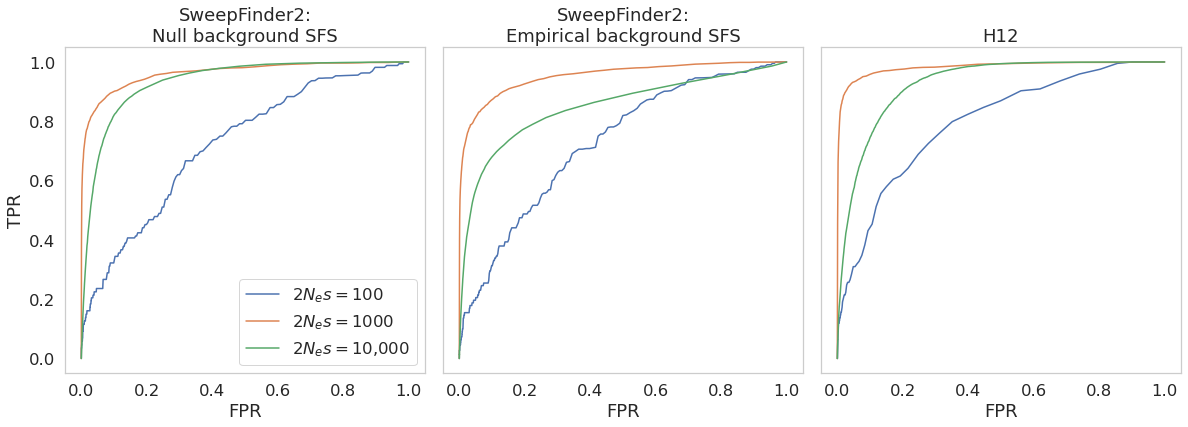

In [20]:
#####PLOT FIGURE4 IN MAIN TEXT. ROC CURVES FOR SF2 (BACKGROUND SFS), SF2 (EMPIRICAL SFS), AND H12. #####
#####INPUT FILES ARE OUTPUTS FROM get_adjacent_window_results.py#####

#Set 2Nes values for plot titles
Nes = ['100', '1000', '10,000']

#Create lists to store dfs for each 2Nes value (sf_lst is for null background results; sf_lst2 is for empirical background)
sf_lst = []
sf_lst2 = []
h_lst = []
#Loop through 2Nes values, reading in inference results, calculating TPR and FPR, and appending to lists
for s in [100, 1000, 10000]:
    
    df = pd.read_csv(sfBackgroundFile, sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    sf_lst.append(df)

    df = pd.read_csv(sfEmpiricalFile, sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    sf_lst2.append(df)
    
    df = pd.read_csv(hFile, sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    h_lst.append(df)

#Plot results    
sns.set(rc={'figure.figsize':(20,6),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)
#Set subplot
plt.subplot(1,3,1)
#Loop through sf_lst, plotting result for each 2Nes value
for i,j in enumerate(sf_lst):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, label=r'$2N_es = $' + Nes[i])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('SweepFinder2:\nNull background SFS')
    plt.legend()

#Repeat for empirical background
plt.subplot(1,3,2)   
for i,j in enumerate(sf_lst2):
    j = j.sort_values('FPR')
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.yticks([])
    plt.title('SweepFinder2:\nEmpirical background SFS')    

#Repeat for H12    
plt.subplot(1,3,3)
for i,j in enumerate(h_lst):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.yticks([])
    plt.title('H12')
    
plt.subplots_adjust(wspace=0.05, hspace=0.12)

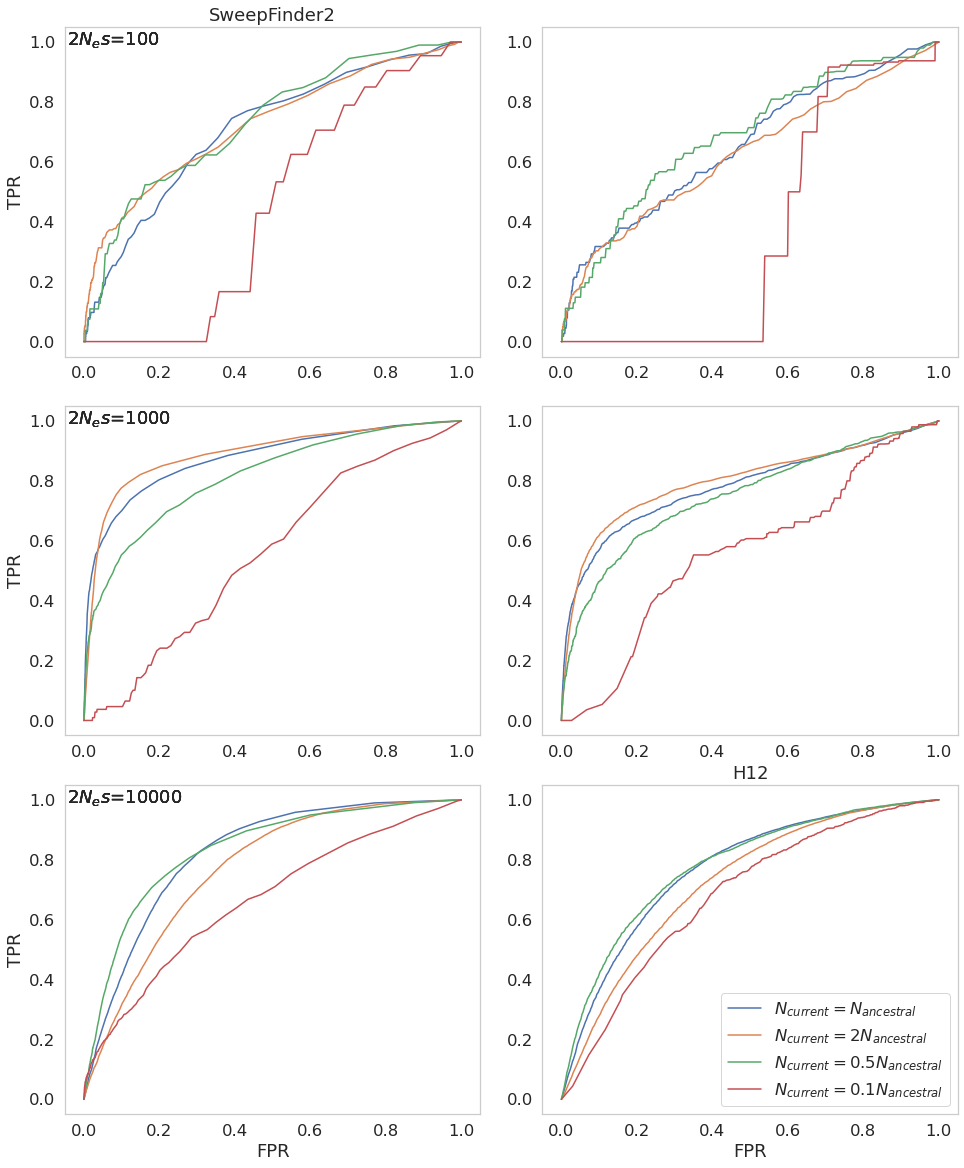

In [15]:
#####PLOT FIGURE5 IN MAIN TEXT. ROC CURVES FOR SF2 (BACKGROUND SFS), AND H12 FOR DEMOGRAPHIC CHANGE. #####
#####INPUT FILES ARE OUTPUTS FROM get_adjacent_window_results.py#####

#Set list of legend titles
titles = [r"$N_{current}=N_{ancestral}$", r"$N_{current}=2N_{ancestral}$", 
         r"$N_{current}=0.5N_{ancestral}$", r"$N_{current}=0.1N_{ancestral}$",
         r"$N_{current}=0.01N_{ancestral}$"]
#Set list of 2Nes values (for text)
Nes = ['100', '1000', '10,000']
#Set plot
sns.set(rc={'figure.figsize':(16,20),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)
#c is iterator for subplots
c = 0
#Loop through 2Nes values
for s in ['100', '1000', '10000']:    
    c+=2
    #Set empty lists to store dfs
    sf_lst = []
    h_lst = []
    #Loop through demographic scenarios, loading in results, calculating TPR and FPR, and appending to list
    for e, demog in enumerate(['stationary', 'expansion', 'contraction', 'c10']):
        sf = sfPath + demog
        h = hPath + demog
        
        df = pd.read_csv(sf + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
        df['TPR'] = df.TP/(df.TP+df.FN)
        df['FPR'] = df.FP/(df.FP+df.TN)
        sf_lst.append(df)

        df = pd.read_csv(h + str(s) + '_1kb.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
        df['TPR'] = df.TP/(df.TP+df.FN)
        df['FPR'] = df.FP/(df.FP+df.TN)
        h_lst.append(df)
        

    plt.subplot(3,2,c-1)
    for i,j in enumerate(sf_lst):
        tpr = j['TPR']
        fpr = j['FPR']
        plt.plot(fpr, tpr, label=titles[i])

        #plt.xlabel('FPR')
        plt.ylabel('TPR')
        if(c==2):
            plt.title('SweepFinder2')
        if(c==6):
            plt.xlabel('FPR')
        plt.text(s=r"$2N_es$="+str(s), x=-0.045, y=0.99)

            
    plt.subplot(3,2,c)
    for i,j in enumerate(h_lst):
        tpr = j['TPR']
        fpr = j['FPR']
        plt.plot(fpr, tpr, label=titles[i])
        if(c==6):
            plt.xlabel('FPR')

        if(c==6):
            plt.title('H12')
            plt.legend()
            
#Adjust spacing between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.15)

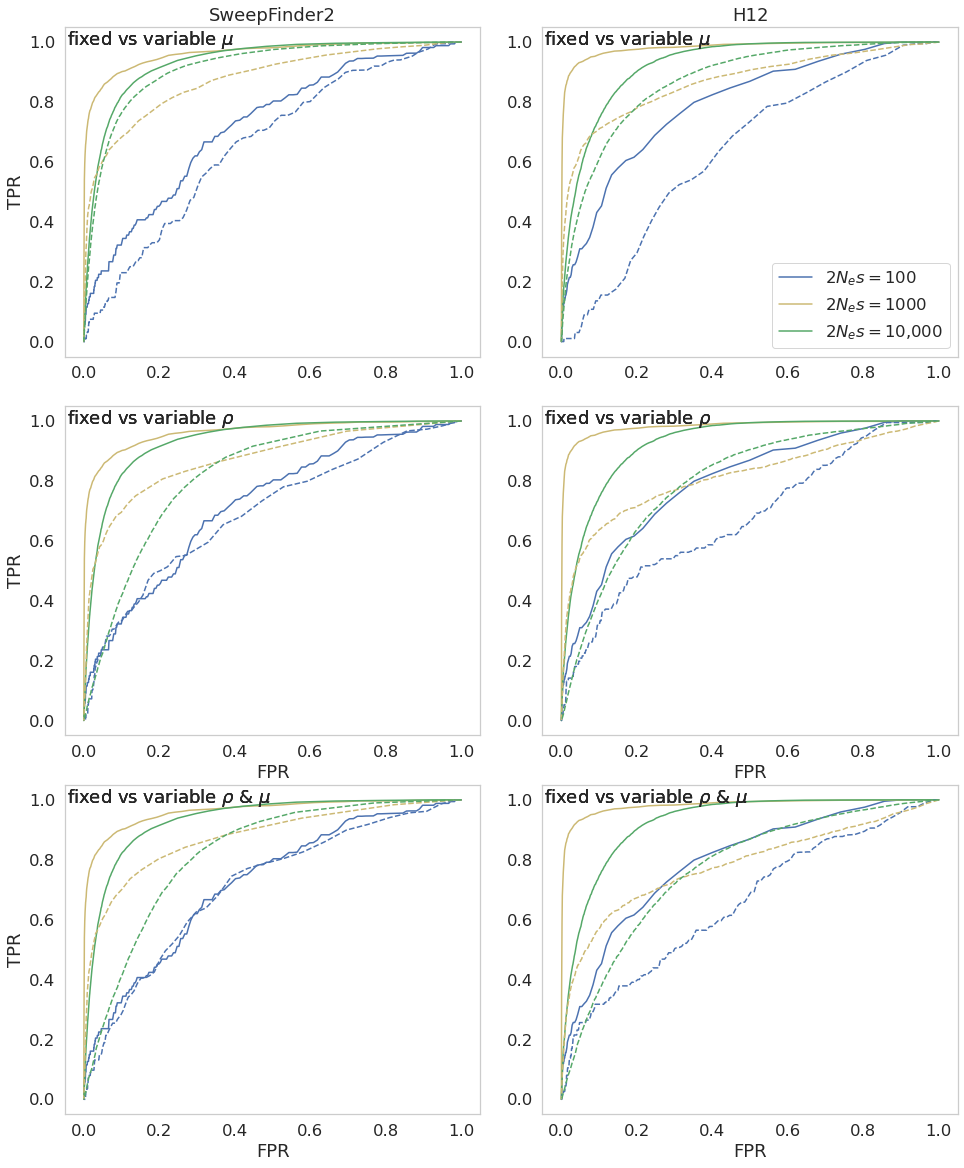

In [7]:
#####PLOT FIGURE6 IN MAIN TEXT. ROC CURVES FOR SF2 (BACKGROUND SFS), AND H12 COMPARING FIXED AND VARIABLE RATES. #####
#####INPUT FILES ARE OUTPUTS FROM get_adjacent_window_results.py#####

#Set list of colours
c = ['b', 'y', 'g']
#Set list of 2Nes values (for plot legend)
Nes = ['100', '1000', '10,000']

sf = sfPath + '/rr_fixed_mu_fixed/'
h = hPath + '/rr_fixed_mu_fixed/'
sf2 = sfPath + '/rr_fixed_mu_variable/'
h2 = hPath + '/rr_fixed_mu_variable/'

#####VARIABLE MUTATION RATES FIRST#####

#Set lists to store dfs
sf_lst = [] #rr = fixed, mu = fixed
sf_lst2 = [] #rr = fixed, mu = variable
h_lst = [] #rr = fixed, mu = fixed
h_lst2 = [] #rr = fixed, mu = variable

#Loop through 2Nes values, calculate TPR and FPR, and append to list
for s in [100, 1000, 10000]:
    df = pd.read_csv(sf + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    sf_lst.append(df)
    

    df = pd.read_csv(sf2 + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    sf_lst2.append(df)
    
    
    df = pd.read_csv(h + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    h_lst.append(df)
    
    df = pd.read_csv(h2 + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    h_lst2.append(df)
    

#Plot these results    
sns.set(rc={'figure.figsize':(16,20),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)
plt.subplot(3,2,1)   
for i,j in enumerate(sf_lst):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, label='2Nes = ' + Nes[i], c=c[i])
    plt.ylabel('TPR')
    plt.title('SweepFinder2')
    plt.text(s=r"fixed vs variable $\mu$", x=-0.045, y=0.99)

for i,j in enumerate(sf_lst2):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, linestyle='--', c=c[i])
 
    
plt.subplot(3,2,2)   
for i,j in enumerate(h_lst):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, label=r'$2N_es = $' + Nes[i], c=c[i])
    plt.title('H12')
    plt.legend()
    plt.text(s=r"fixed vs variable $\mu$", x=-0.045, y=0.99)

    
for i,j in enumerate(h_lst2):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, linestyle='--', c=c[i]) 
    
    
    
sf2 = sfPath + '/rr_variable_mu_fixed/'
h2 = hPath + '/rr_variable_mu_fixed/'

#####REPEAT FOR VARIABLE RECOMBINATION RATE RESULTS#####
sf_lst = [] #rr = fixed, mu = fixed
sf_lst2 = [] #rr = variable, mu = fixed
h_lst = [] #rr = fixed, mu = fixed
h_lst2 = [] #rr = variable, mu = fixed

#Repeat, as above
for s in [100, 1000, 10000]:
    df = pd.read_csv(sf + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    sf_lst.append(df)
    

    df = pd.read_csv(sf2 + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    sf_lst2.append(df)
    
    
    df = pd.read_csv(h + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    h_lst.append(df)
    
    df = pd.read_csv(h2 + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    h_lst2.append(df)
    
    
plt.subplot(3,2,3)   
for i,j in enumerate(sf_lst):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, label='2Nes = ' + Nes[i], c=c[i])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.text(s=r"fixed vs variable $\rho$", x=-0.045, y=0.99)

for i,j in enumerate(sf_lst2):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, linestyle='--', c=c[i])
    
plt.subplot(3,2,4)   
for i,j in enumerate(h_lst):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, label='2Nes = ' + Nes[i], c=c[i])
    plt.xlabel('FPR')
    plt.text(s=r"fixed vs variable $\rho$", x=-0.045, y=0.99)
    
for i,j in enumerate(h_lst2):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, linestyle='--', c=c[i]) 

    
sf2 = sfPath + '/rr_variable_mu_variable/'
h2 = hPath + '/rr_variable_mu_variable/'

#####REPEAT FOR VARIABLE RECOMBINATION AND MUTATION RATES#####
sf_lst = [] #rr = fixed, mu = fixed
sf_lst2 = [] #rr = variable, mu = variable
h_lst = [] #rr = fixed, mu = fixed
h_lst2 = [] #rr = variable, mu = variable

for s in [100, 1000, 10000]:
    df = pd.read_csv(sf + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    sf_lst.append(df)
    

    df = pd.read_csv(sf2 + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    sf_lst2.append(df)
    
    
    df = pd.read_csv(h + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    h_lst.append(df)
    
    df = pd.read_csv(h2 + str(s) + '.txt', sep='\t', names=['threshold','TP','FP','TN','FN'])
    df['TPR'] = df.TP/(df.TP+df.FN)
    df['FPR'] = df.FP/(df.FP+df.TN)
    h_lst2.append(df)
    
plt.subplot(3,2,5)   
for i,j in enumerate(sf_lst):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, label='2Nes = ' + Nes[i], c=c[i])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.text(s=r"fixed vs variable $\rho$ & $\mu$", x=-0.045, y=0.99)

for i,j in enumerate(sf_lst2):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, linestyle='--', c=c[i])
    
plt.subplot(3,2,6)   
for i,j in enumerate(h_lst):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, label='2Nes = ' + Nes[i], c=c[i])
    plt.xlabel('FPR')
    plt.text(s=r"fixed vs variable $\rho$ & $\mu$", x=-0.045, y=0.99)
    
for i,j in enumerate(h_lst2):
    tpr = j['TPR']
    fpr = j['FPR']
    plt.plot(fpr, tpr, linestyle='--', c=c[i]) 
    
    
#Adjust spacing between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.15)